Phân tích EDA cho dữ liệu product trong 'order_products_prior.csv':

1.Tìm tên 10 sản phẩm bán được nhiều nhất và vẽ biểu đồ

2.Tìm tên 10 sản phẩm được re-ordered nhiều nhất và vẽ biểu đồ

3.Thống kê số lượng sản phẩm bán được của các department và vẽ biểu đồ
- Biểu đồ cột
- Biểu đồ tree-map


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

# Đọc file csv
data1 = pd.read_csv('order_products_prior.csv')
data2 = pd.read_csv('products.csv')
data3 = pd.read_csv('departments.csv')
merged_df = data1.merge(data2, on='product_id').merge(data3, on='department_id')
merged_df.head(20)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department
0,2,33120,1,1,Organic Egg Whites,86,16,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,produce
2,2,9327,3,0,Garlic Powder,104,13,pantry
3,2,45918,4,1,Coconut Butter,19,13,pantry
4,2,30035,5,0,Natural Sweetener,17,13,pantry
5,2,17794,6,1,Carrots,83,4,produce
6,2,40141,7,1,Original Unflavored Gelatine Mix,105,13,pantry
7,2,1819,8,1,All Natural No Stir Creamy Almond Butter,88,13,pantry
8,2,43668,9,0,Classic Blend Cole Slaw,123,4,produce
9,3,33754,1,1,Total 2% with Strawberry Lowfat Greek Strained...,120,16,dairy eggs


product_name
Banana                    472565
Bag of Organic Bananas    379450
Organic Strawberries      264683
Organic Baby Spinach      241921
Organic Hass Avocado      213584
Organic Avocado           176815
Large Lemon               152657
Strawberries              142951
Limes                     140627
Organic Whole Milk        137905
Name: count, dtype: int64


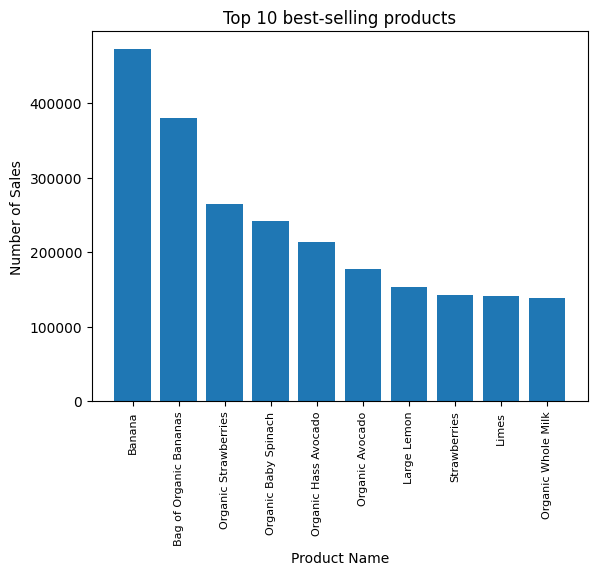

In [25]:
# Tìm tên 10 sản phẩm bán nhiều nhất
top_10_products_sold = merged_df['product_name'].value_counts().head(10)
print(top_10_products_sold)

# Vẽ biểu đồ cột
plt.bar(top_10_products_sold.index, top_10_products_sold.values)
plt.xticks(rotation=90, fontsize=8)
plt.xlabel('Product Name')
plt.ylabel('Number of Sales')
plt.title('Top 10 best-selling products')
plt.show()

product_name
Banana                    398609
Bag of Organic Bananas    315913
Organic Strawberries      205845
Organic Baby Spinach      186884
Organic Hass Avocado      170131
Organic Avocado           134044
Organic Whole Milk        114510
Large Lemon               106255
Organic Raspberries       105409
Strawberries               99802
Name: reordered, dtype: int64


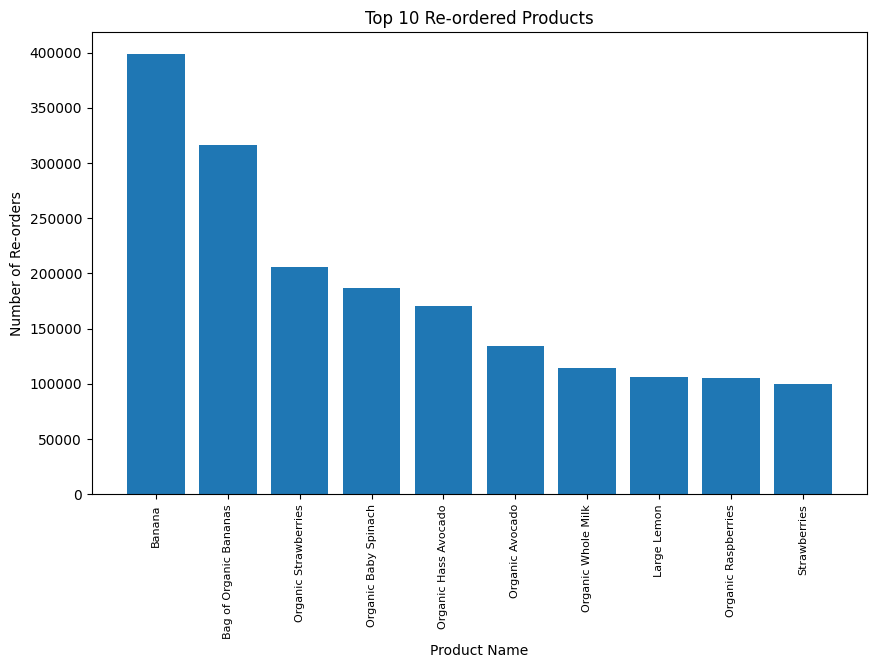

In [26]:
# Tìm tên 10 sản phẩm reorder nhiều nhất
reordered_counts = merged_df.groupby('product_name')['reordered'].sum().sort_values(ascending=False).head(10)
print(reordered_counts)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.bar(reordered_counts.index, reordered_counts.values)
plt.title('Top 10 Re-ordered Products')
plt.xlabel('Product Name')
plt.ylabel('Number of Re-orders')
plt.xticks(rotation=90, fontsize=8)
plt.show()

In [27]:
# Thống kê số lượng sản phẩm bán được của các department
department_counts = merged_df['department'].value_counts()
department_counts.head(20)

department
produce            9479291
dairy eggs         5414016
snacks             2887550
beverages          2690129
frozen             2236432
pantry             1875577
bakery             1176787
canned goods       1068058
deli               1051249
dry goods pasta     866627
household           738666
breakfast           709569
meat seafood        708931
personal care       447123
babies              423802
international       269253
alcohol             153696
pets                 97724
missing              69145
other                36291
Name: count, dtype: int64

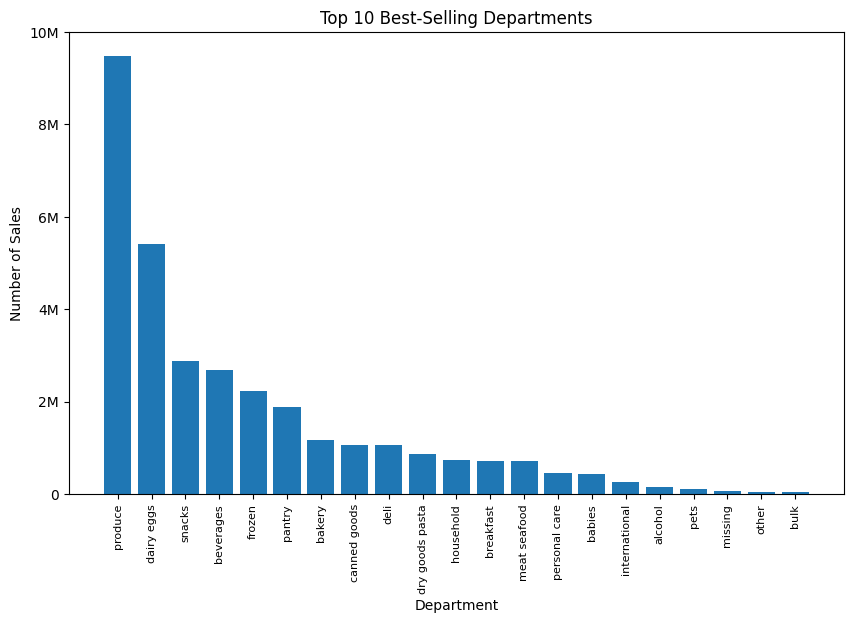

In [28]:
# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
plt.bar(department_counts.index, department_counts.values)
plt.title('Top 10 Best-Selling Departments')
plt.xlabel('Department')
plt.ylabel('Number of Sales')
plt.xticks(rotation=90, fontsize=8)
plt.yticks(range(0, 10000001, 2000000),['0', '2M', '4M', '6M', '8M', '10M'])
plt.show()

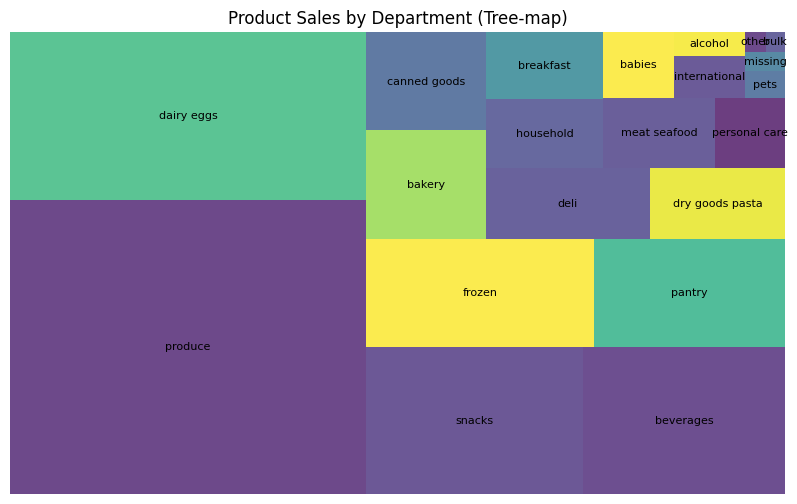

In [29]:
# Chỉnh kích thước chữ và các tham số liên quan
label_kwargs = {'fontsize': 8}

# Vẽ biểu đồ tree-map
plt.figure(figsize=(10, 6))
squarify.plot(sizes=department_counts.values, label=department_counts.index, alpha=0.8, text_kwargs=label_kwargs)
plt.title('Product Sales by Department (Tree-map)')
plt.axis('off')
plt.show()